<a href="https://colab.research.google.com/github/jhomolos/data_projects/blob/main/Desafio_4_Estrat%C3%A9gia_de_Marketing_em_M%C3%ADdias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT (2).csv


In [ ]:
#import libraries

import pandas as pd
import numpy as np

In [ ]:
#importar dataframe
df = pd.read_csv('MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# **ETAPA 1 - ANÁLISE DESCRITIVA**

Aqui iniciamos a análise realizando uma preparação de dados. Ao observá-los, verifica-se que a princípio não há necessidade de excluir colunas, visto que todas as features parecem ser relevantes para estimação das vendas (*sales*), bem como não há necessidade de renomear as colunas, visto que seguem boas práticas de programação. Verifica-se também que não há variáveis categóricas, mas sim, numéricas, portanto, não precisamos fazer conversão através da função *get_dummies* do pandas.

In [ ]:
# verificar tipo de dados das features
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Verifica-se com os comandos *dtypes* que todas as variáveis são do dtipo *float64*, portanto, apropriadas para os dados com que estamos trabalhando. Com a função *info* verifica-se também que para todas as colunas, todos os registros são não-nulos, portanto, não há necessidade de modificar ou excluir esses valores.

In [ ]:
# Eliminando entradas duplicadas
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Nosso dataframe continua com a mesma quantidade de entradas (171). Portanto, não havia entradas duplicadas.

In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Ao se utilizar a função *describe*, verifica-se que para todas as features, o desvio padrão (*std*) é menor do que a média (*mean*), eliminando a princípio a necessidade de se utilizar filtros para excluir registros discrepantes, que poderiam mais a frente acarretar um modelo mal treinado. Pela análise dos quartis, verificamos que a distribuição dos dados entre os quartis está homogênea, o que a princípio dispensa também a necessidade de eliminação de entradas. Finalizamos então a preparação de dados com o dataframe original e passaremos à análise exploratória.

#**ETAPA 2 - ANÁLISE EXPLORATÓRIA**

Neta etapa iremos explorar mais a fundo os dados, identificando relações entre as variáveis e descobrindo padrões relevantes.

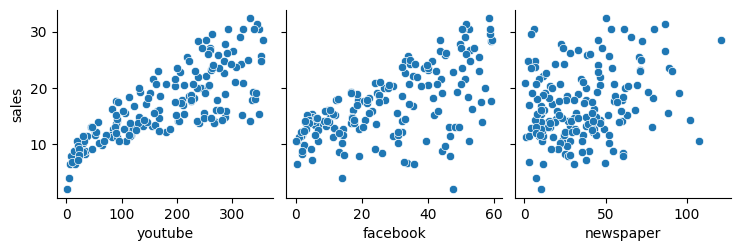

In [ ]:
#importa a biblioteca seaborn para identificar relações entre variáveis e correlacioná-las
import seaborn as sns

sns.pairplot(df, x_vars=["youtube", "facebook","newspaper"], y_vars="sales")

Verifica-se nos gráficos que as features 'youtube' e 'facebook' possuem forte correlação com as vendas, isto é, as vendas crescem à medida que os gastos com essas mídias aumentam. O mesmo não se verifica com a feature 'newspaper', que apresenta uma distribuição  aleatória, sem um padrão definido, o que nos permite concluir que o investimento em "newspaper" não possui correlação considerável com as vendas, uma vez que há vendas baixas e altas, tanto para pouco quanto para um maior investimentos maior, de até 50 "dinheirosk". Por outro lado, dentre os investimentos em youtube e facebook, os gastos com facebook apresentam maior dispersão e até mesmo alguns outliers nesse contexto, em que se realizou um alto investimentos e se obteve um baixo retorno. Percebe-se que é necesário investir altas somas em Youtube para se obter um retorno semelhante ao que teríamos com investimentos mais baixos no Facebook.

In [ ]:
#cria sub dataframes para colocá-los em ordem crescente pela mídia e plotar gráficos
youtubeDf = df[["youtube","sales"]]
youtubeDf = youtubeDf.sort_values(by=['youtube'])
facebookDf = df[["facebook","sales"]]
facebookDf = facebookDf.sort_values(by=['facebook'])
newspaperDf = df[["newspaper","sales"]]
newspaperDf = newspaperDf.sort_values(by=['newspaper'])

In [ ]:
import matplotlib.pyplot as plt

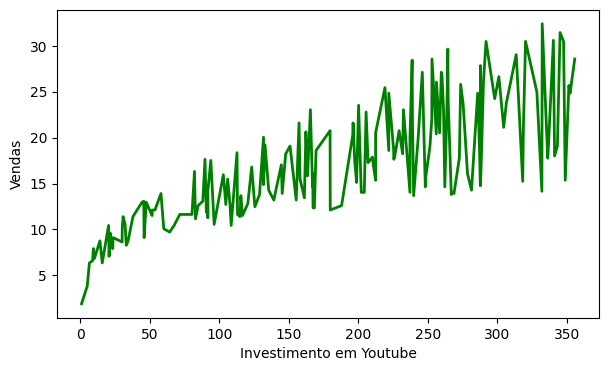

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.xlabel("Investimento em Youtube")
plt.ylabel("Vendas")
xYoutube = youtubeDf[["youtube"]]
yYoutube = youtubeDf[["sales"]]
plt.plot(xYoutube,yYoutube, color = "green", linewidth = "2")
plt.show()

O gráfico de investimento no Youtube permite-nos visualizar uma tendência de aumento das vendas com o aumento do investimento nesta mídia.

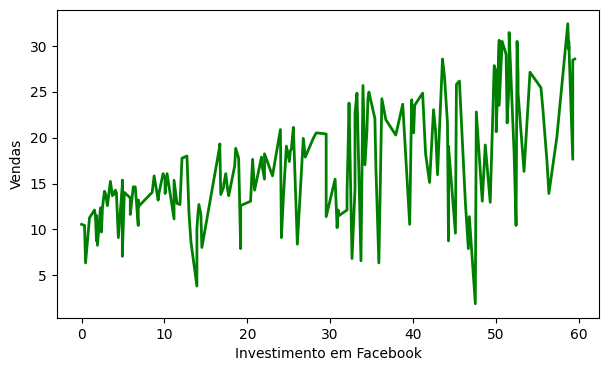

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.xlabel("Investimento em Facebook")
plt.ylabel("Vendas")
xFacebook = facebookDf[["facebook"]]
yFacebook = facebookDf[["sales"]]
plt.plot(xFacebook,yFacebook, color = "green", linewidth = "2")
plt.show()

O gráfico de investimento no Facebook permite-nos visualizar uma tendência de aumento das vendas com o aumento do investimento nesta mídia.

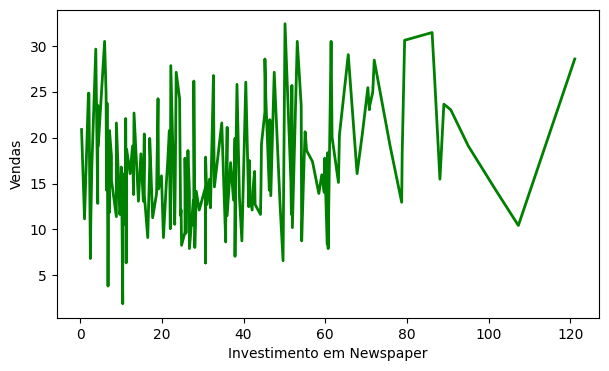

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.xlabel("Investimento em Newspaper")
plt.ylabel("Vendas")
xNewspaper = newspaperDf[["newspaper"]]
yNewspaper = newspaperDf[["sales"]]
plt.plot(xNewspaper,yNewspaper, color = "green", linewidth = "2")
plt.show()

O gráfico de investimento em Newspaper não nos permite visualizar qualquer correlação entre o aumento de investimento com o aumento nas vendas. Entre 0 e 60 em investimento nessa mídia, percebe-se que a sua influência pode ser negligenciada, podendo inclusive, esta mídia ser considerada para o treinamento do nosso modelo de Regressão Linear mais a frente, aumentando assim, a assertividade do nosso modelo.

<Axes: >

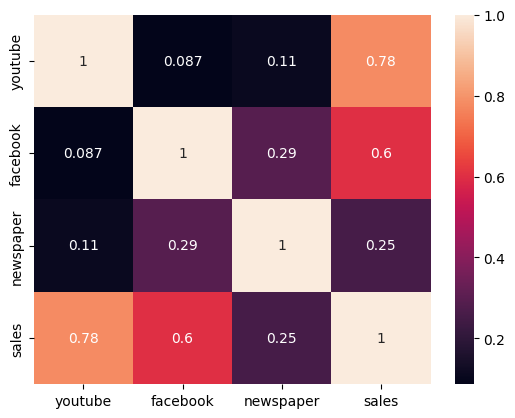

In [ ]:
sns.heatmap(df.corr(), annot= True)

Ao observamos o mapa de calor, verificamos que de fato os gastos com jornais (newspaper) possuem menos correlação com as vendas (sales), ao contrário dos gastos com Youtube e Facebook, que contribuem bem mais.

<Axes: xlabel='sales', ylabel='Count'>

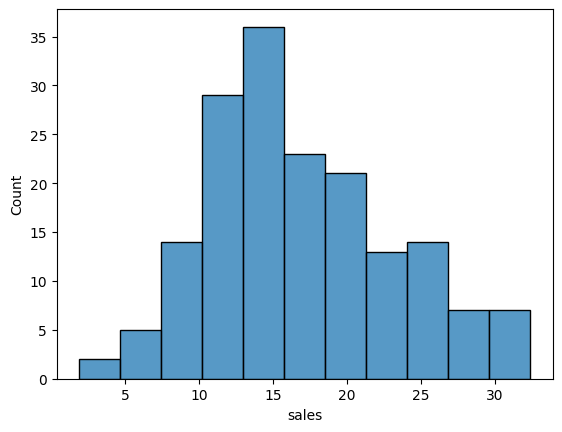

In [ ]:
sns.histplot(df['sales'])

Ao plotarmos o histograma das vendas, verificamos ele apresenta o comportamento de uma distribuição normal, e que para nossos dados, temos maior ocorrência de vendas entre 10 e 20 "dinheiros", conforme também pode ser observado ao executarmos a função describe () e observamos os quartis de 25 e 75%.

# **MODELAGEM**

Aqui será criado um modelo de regressão linear para predizer as vendas conforme os investimentos em mídia realizados. Para isso, o dataframe será dividido entre variáveis de entrada (X) e de saída (y), e essas variáveis serão divididas também para treinar e para testar o nosso modelo de regressão linear.

In [ ]:
#separamos as features em dados de entrada X e de saída (target) y. Aqui a feature "newspaper" foi desconsiderada, por não apresentar correlação com as vendas
X = df[["youtube", "facebook"]]
y = df[["sales"]]

In [ ]:
#importamos a função train_test_split do Scikit Learn para separar os dados e usá-los para treinar e testar o nosso modelo
from sklearn.model_selection import train_test_split

In [ ]:
#separamos os dados para criar as variáveis de teste e de treino, usando 70% dos dados para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
#importamos a função de Regressão Linear do Scikit Learn e criamos o modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
#treinamento do modelo
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predizemos uma saída usando a variável X_test
y_pred = lm.predict(X_test)

In [ ]:
# Comparamos a saída que predizemos usando os dados de saída teste y_test, a fim de calcular a taxa de acerto do modelo
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [ ]:
#imprimos a métrica R quadrado do nosso modelo de regressão linear . OBS.:  o r² considerando a feature "newspaper" de 88.24%.
print('A taxa de acerto R² do modelo é de {:.2f}%'.format(r*100))

A taxa de acerto R² do modelo é de 88.25%


In [ ]:
# incluindo a feature "newspaper"
X = df[["youtube", "facebook", "newspaper"]]
y = df[["sales"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r = r2_score(y_test, y_pred)
print('A taxa de acerto R² do modelo é de {:.2f}%'.format(r*100))

A taxa de acerto R² do modelo é de 88.24%


Verificamos, portanto, que incluir ou excluir a feature "newspaper" não influencia significativamente a assertividade do nosso modelo de Regressão Linear. Para fins didáticos, a feature "newspaper" permanecerá na nossa predição a seguir.

# **ETAPA 4 - CALCULANDO PREDIÇÃO**

Iremos aplicar agora o modelo de regressão construído nas etapas anteriores para realizar as previsões de retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

Visto que o modelo foi aprovado, o analista de marketing sugeriu três estratégias de investimentos em publicidade, e dentre eles, iremos verificar o que acarretará maiores vendas para a empresa, considerando um orçamento total para a área de 160 "dinheiros".

Essas três estratégias são:

1) Youtube = 70, Facebook = 60 e Newspaper = 30

2) Youtube = 50, Facebook = 60 e Newspaper = 50

3) Youtube = 30, Facebook = 60 e Newspaper = 70

Premissas:

1) devem ser feitos gastos com publicidade em todas as mídias, com um mínimo de 5 "dinheiros" em cada uma delas e no máximo 100.

2)  O investimento em Facebook será fixado em 60, por esse valor ter sido utilizado para treinar o nosso modelo e por contribuir mais com as vendas quando comparado com o mesmo valor investido em Youtube.

In [ ]:
# Estratégia 1
youtube = 70
facebook = 60
newspaper = 30

entrada = [[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.11098699])

In [ ]:
# Estratégia 2
youtube = 50
facebook = 60
newspaper = 50

entrada = [[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.20390083])

In [ ]:
# Estratégia 3
youtube = 30
facebook = 60
newspaper = 70

entrada = [[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.29681466])

Verifica-se portanto que dentre as 3 estratégias apresentadas, a melhor é a 1, concentrado os gastos com mídia no Youtube, seguido de gastos no Facebook, e por último, em jornais (newspaper).